In [ ]:
# A. Rendu 1 : Travail sur le jeu de données.


In [ ]:
# 1. Acquisition des données

# 2. Nettoyage des données

# 3.Visualisations et Statistiques (DataViz et EDA)


/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_44277/901241518.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/talia/Desktop/JC/PROJETS/Datascientest/Livrables/2_ML/reviews_FINAL.csv')


Text(0, 0.5, "Nb d'avis")

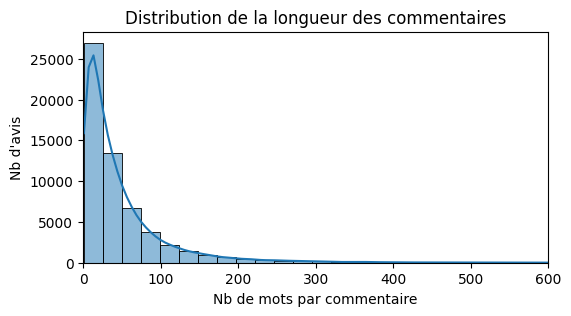

In [33]:

# 3. 1. Nombre d’avis par taille des commentaires

# Création de len : Longueur d'un commentaire
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/DST/reviews_FINAL.csv')


df.rename(columns={'text': 'Content', 'rating': 'Rating', 'language': 'Language'}, inplace=True)
suppr = ['pending', 'filtered','labels.merged.businessIdentifyingName', 'labels.verification.hasDachExclusion', 'location.id', 
         'location.name', 'location.urlFormattedName','Language','labels.verification.isVerified','title', 'consumer.id', 
         'consumer.isVerified','consumer.displayName', 'consumer.imageUrl','consumer.numberOfReviews','consumer.countryCode',
         'consumer.hasImage','reply.message', 'reply.publishedDate','reply.updatedDate','consumersReviewCountOnSameDomain',
         'consumersReviewCountOnSameLocation', 'Brand','dates.updatedDate',"id", "hasUnhandledReports", "labels.verification.verificationSource",
        "labels.verification.createdDateTime", "labels.verification.reviewSourceName", "labels.verification.verificationLevel", "report"]
        
df = df.drop(columns=suppr)
def add_comment_length(df):
    df['len'] = df['Content'].apply(lambda x: len(x.split()))
    return df

df = add_comment_length(df)

plt.figure(figsize = (6,3))
sns.histplot(df['len'], bins=50, kde =True)
plt.xlim(0,600)
plt.title('Distribution de la longueur des commentaires')
plt.xlabel('Nb de mots par commentaire')
plt.ylabel('Nb d\'avis')


Text(0.5, 1.0, 'Nombre de mots dans le commentaire par note')

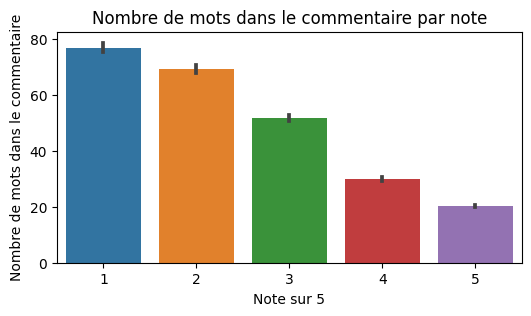

In [34]:
# 3. 2. Nombre de mots dans un commentaire par note.

plt.figure(figsize=(6,3))
sns.barplot(x=df['Rating'], y=df['len'])
plt.xlabel('Note sur 5')
plt.ylabel('Nombre de mots dans le commentaire')
plt.title('Nombre de mots dans le commentaire par note')

Text(0, 0.5, 'Nb de mot par commentaire')

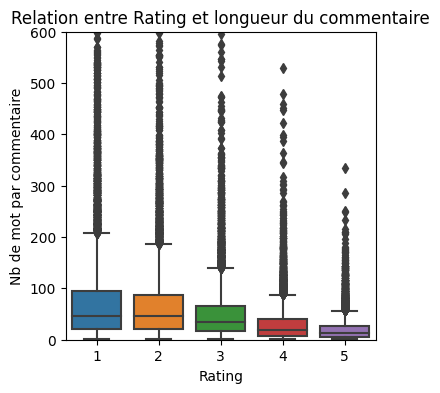

In [35]:
# 3. 3. Répartition du nombre de mots par commentaire par note

plt.figure(figsize = (4,4))
sns.boxplot(x=df['Rating'], y=df['len'])
plt.ylim (0,600)
plt.title('Relation entre Rating et longueur du commentaire')
plt.xlabel('Rating')
plt.ylabel('Nb de mot par commentaire')

Text(0, 0.5, "Nb d'avis")

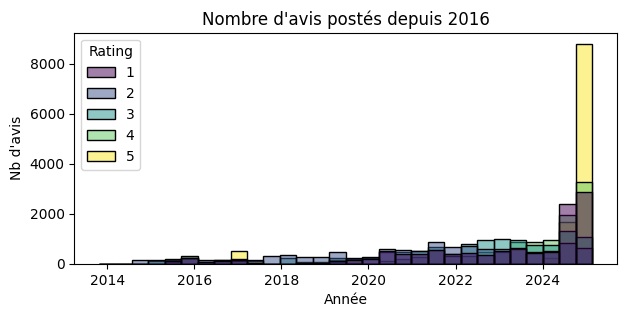

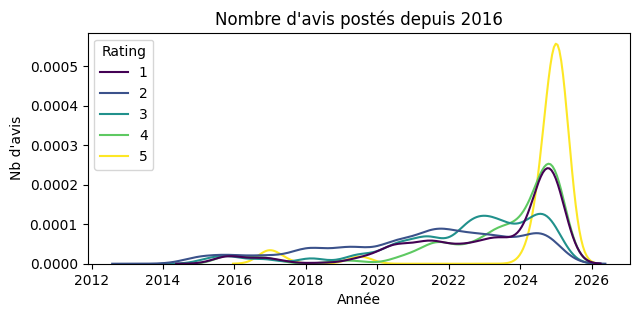

In [36]:
# 3. 4. Evolution du nombre d’avis depuis 2016

# Conversion de ISO à format Datetime
df['dates.publishedDate'] = pd.to_datetime(df['dates.publishedDate'])
# si besoin: extraction de la date
#df['Date_avis'] = df['Date_avis'].dt.date
# Mais on préfère extraire YMD depuis le format datetime
df["Year"] = df["dates.publishedDate"].dt.year
df["Month"] = df["dates.publishedDate"].dt.month
df["Day"] = df["dates.publishedDate"].dt.dayofweek + 1 # lundi = 1 et non lundi =0

plt.figure(figsize=(7,3))
sns.histplot(x=df['dates.publishedDate'], hue=df['Rating'] , bins=30, palette='viridis')
plt.title('Nombre d\'avis postés depuis 2016')
plt.xlabel('Année')
plt.ylabel('Nb d\'avis')

plt.figure(figsize=(7,3))
sns.kdeplot(x='dates.publishedDate', hue='Rating', data=df, palette='viridis')
plt.title('Nombre d\'avis postés depuis 2016')
plt.xlabel('Année')
plt.ylabel('Nb d\'avis')

/var/folders/vf/1n65j1vx36v93w2m9fv4pfyh0000gn/T/ipykernel_44277/3686149545.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year_Month'] = df['dates.publishedDate'].dt.to_period('M')


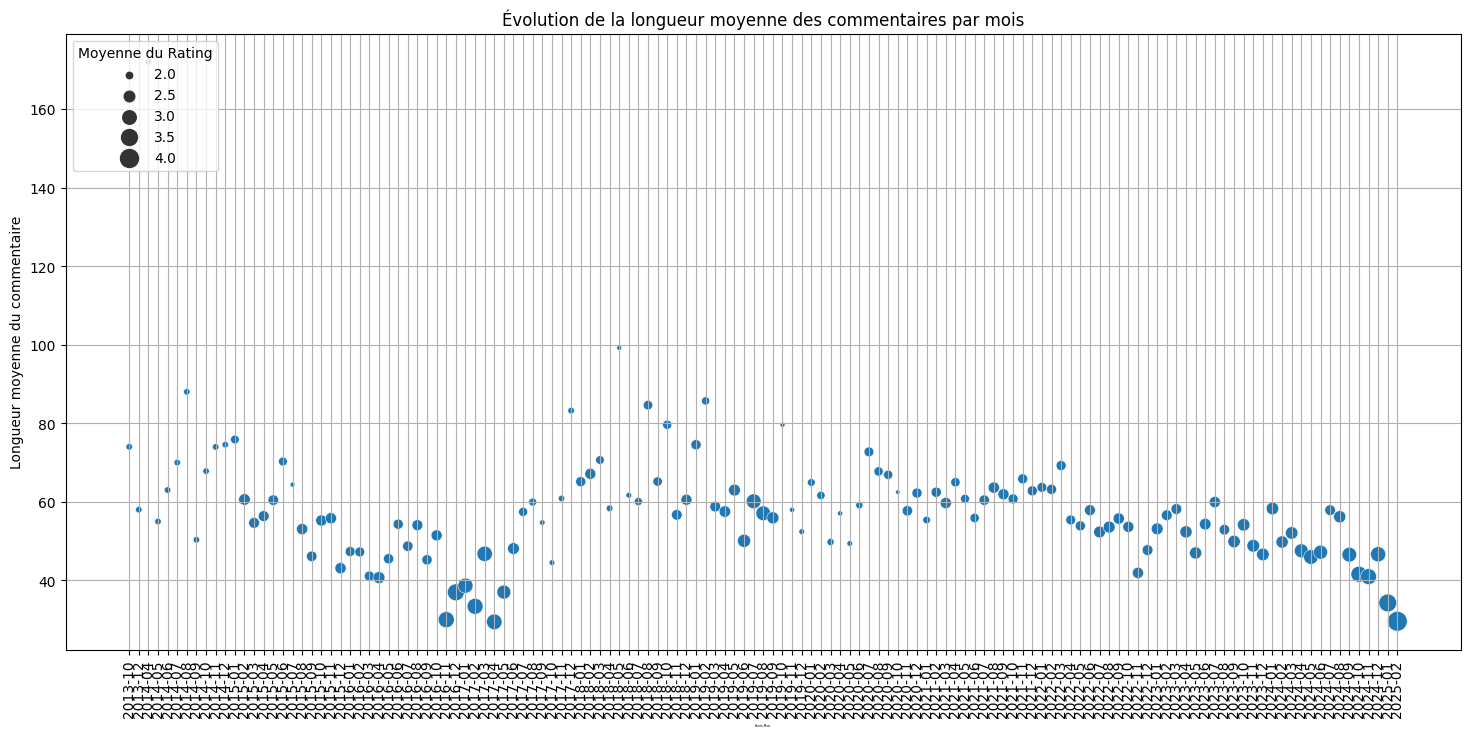

In [37]:
# 3. 5. Évolution de la longueur moyenne des avis
df['dates.publishedDate'] = pd.to_datetime(df['dates.publishedDate'])

# Extraire l'année et le mois sous le format "YYYY-MM"
df['Year_Month'] = df['dates.publishedDate'].dt.to_period('M')

# Calculer la moyenne de la longueur des commentaires par mois
monthly_avg_length = df.groupby('Year_Month')['len'].mean()

# Calculer la moyenne du rating par mois
monthly_avg_rating = df.groupby('Year_Month')['Rating'].mean()

# Convertir en DataFrame pour affichage
monthly_stats = pd.DataFrame({
    'Avg_Content_Length': monthly_avg_length,
    'Avg_Rating': monthly_avg_rating
}).reset_index()

# Convertir Year_Month en format string pour l'affichage correct
monthly_stats['Year_Month'] = monthly_stats['Year_Month'].astype(str)


plt.figure(figsize=(18, 8))
sns.scatterplot(x=monthly_stats['Year_Month'], y=monthly_stats['Avg_Content_Length'], size=monthly_stats['Avg_Rating'], sizes=(10, 200), legend=True)
plt.xticks(rotation=90)  
plt.title("Évolution de la longueur moyenne des commentaires par mois")
plt.xlabel("Année-Mois", fontsize=2)
plt.ylabel("Longueur moyenne du commentaire")
plt.grid()
plt.legend(title="Moyenne du Rating", loc="upper left")
plt.show()



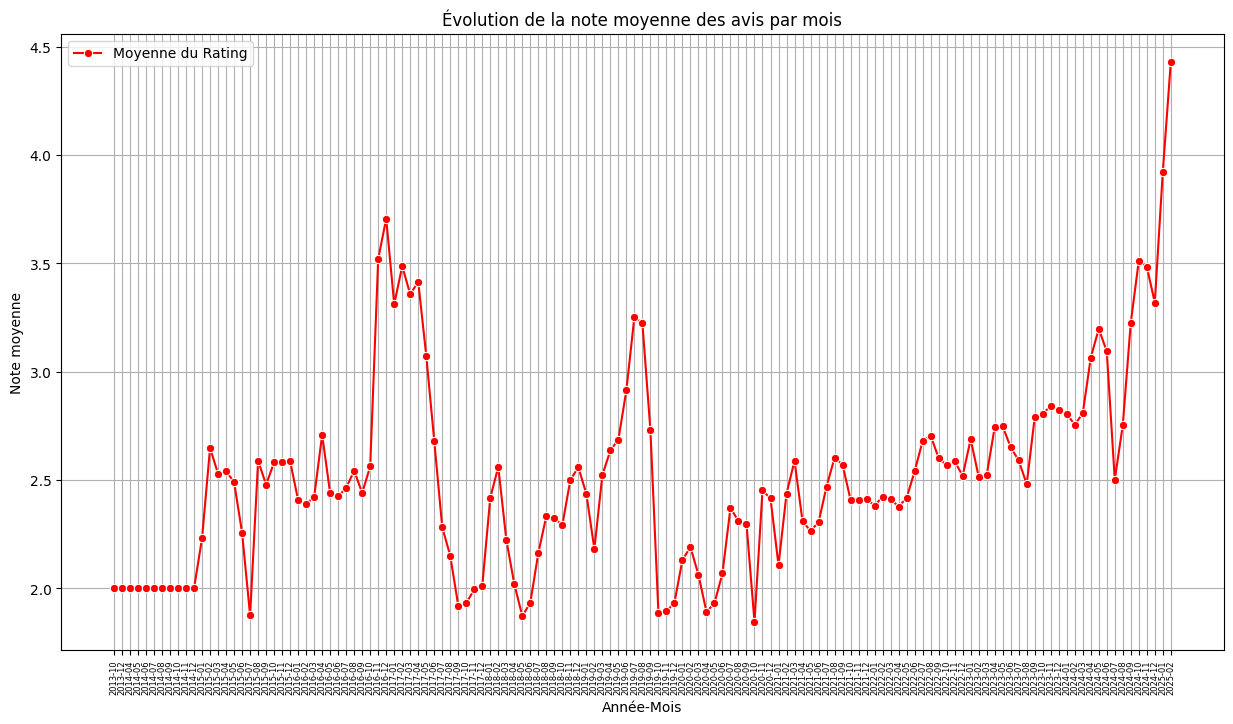

In [38]:
# 3. 6. Evolution de la note moyenne des avis par mois

plt.figure(figsize=(15, 8))
sns.lineplot(x=monthly_stats['Year_Month'], y=monthly_stats['Avg_Rating'], marker='o', label="Moyenne du Rating", color="red")
plt.xticks(rotation=90, fontsize=6)  # Rotation pour lisibilité
plt.title("Évolution de la note moyenne des avis par mois")
plt.xlabel("Année-Mois")
plt.ylabel("Note moyenne")
plt.grid()
plt.show()




Text(0.5, 1.0, 'Nombre de likes en fonction de la note')

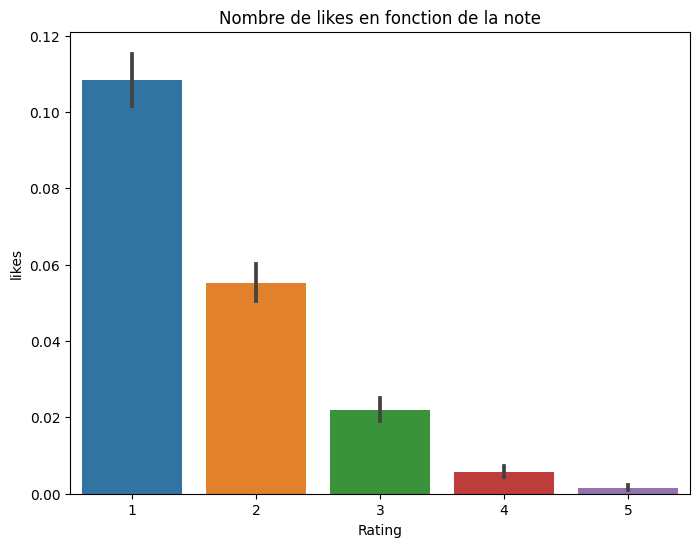

In [49]:
# 3. 7 Nombre de likes par note
plt.figure(figsize=(8,6))
sns.barplot(x="Rating", y='likes', data=df)
plt.title("Nombre de likes en fonction de la note")

Text(0.5, 1.0, 'Nombre de likes pour chaque note')

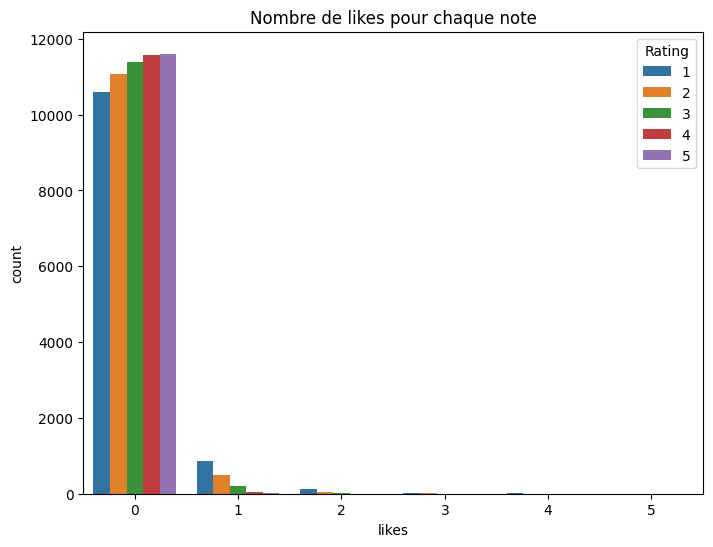

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(hue="Rating", x='likes', data=df)
plt.title("Nombre de likes pour chaque note")

Text(0.5, 1.0, 'Nombre de likes pour chaque note, sans les 0 likes')

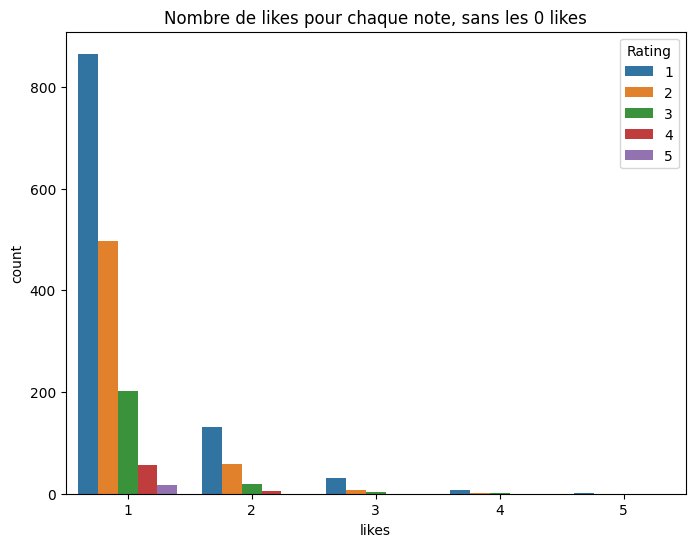

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(hue="rating", x='likes', data=df[df["likes"]!=0])
plt.title("Nombre de likes pour chaque note, sans les 0 likes")

Text(0.5, 1.0, "Temps moyen entre la publication et l'expérience en fonction de la note")

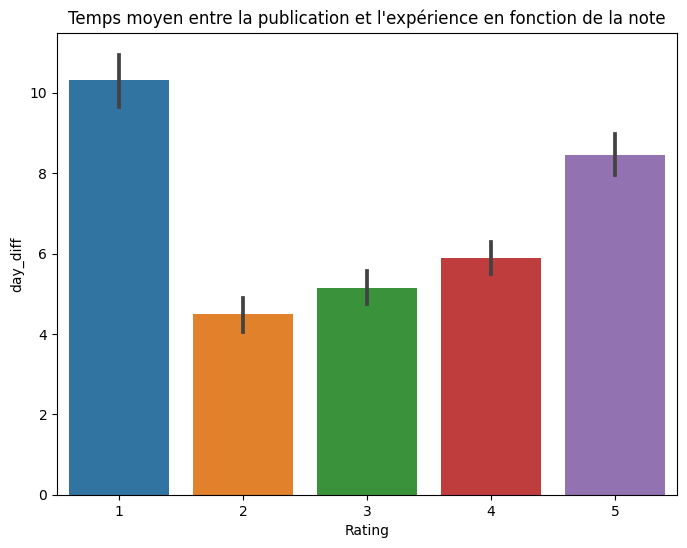

In [58]:
# 3. 8. Création de la métrique “day_diff”


df["day_diff"] = pd.to_datetime(df["dates.publishedDate"]) - pd.to_datetime(df["dates.experiencedDate"])
df["day_diff"] = df["day_diff"].fillna(pd.Timedelta(0))
df["day_diff"] = df["day_diff"].dt.days

plt.figure(figsize=(8,6))
sns.barplot(x="Rating", y='day_diff', data=df)
plt.title("Temps moyen entre la publication et l'expérience en fonction de la note")

Text(0.5, 1.0, "Nombre de jours d'attente pour chaque note")

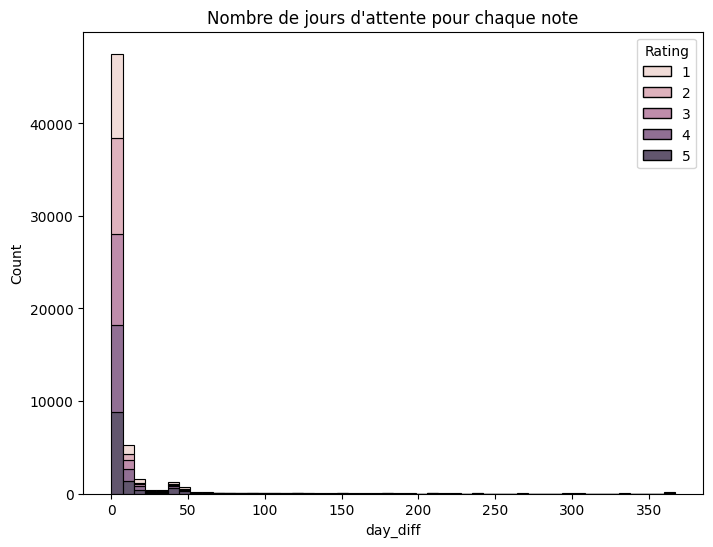

In [56]:
plt.figure(figsize=(8,6))
sns.histplot(hue="Rating", x='day_diff', data=df, bins=50, multiple="stack")
plt.title("Nombre de jours d'attente pour chaque note")

Text(0.5, 1.0, "Nombre dfe jours d'attente (< 75) pour chaque note")

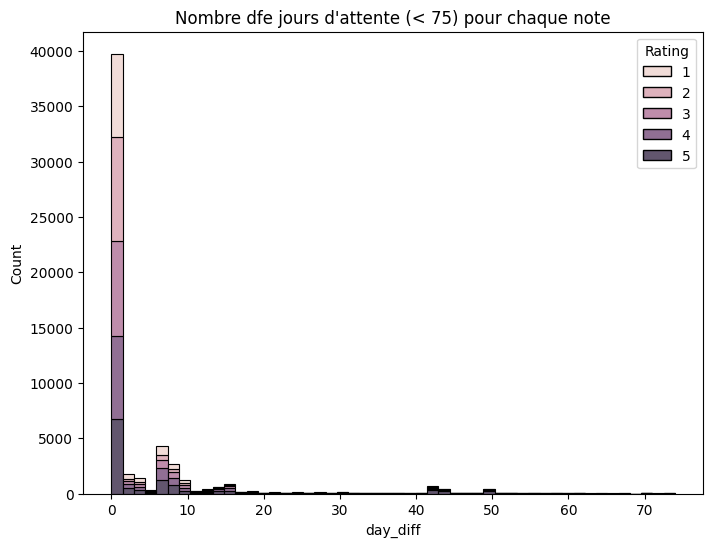

In [60]:
plt.figure(figsize=(8,6))
day = 75
sns.histplot(hue="Rating", x='day_diff', data=df[df["day_diff"]<day], bins=50, multiple="stack")
plt.title(f"Nombre dfe jours d'attente (< {day}) pour chaque note")

Text(0.5, 1.0, "Nombre dfe jours d'attente (>= 75) pour chaque note")

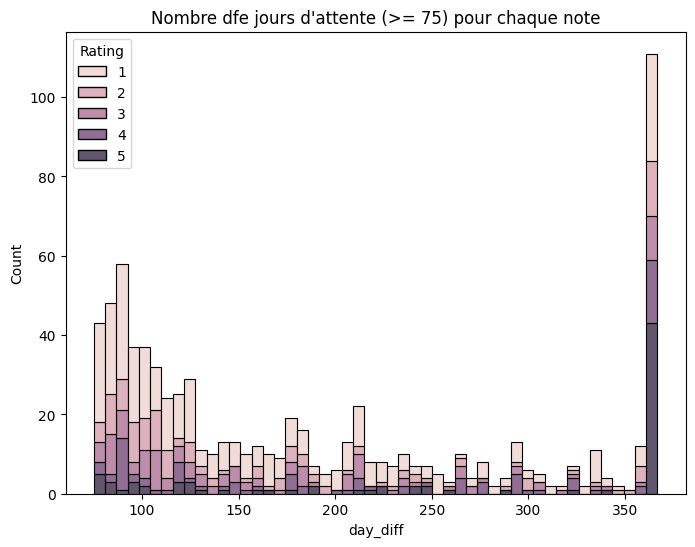

In [61]:
plt.figure(figsize=(8,6))
day = 75
sns.histplot(hue="Rating", x='day_diff', data=df[df["day_diff"]>=day], bins=50, multiple="stack")
plt.title(f"Nombre dfe jours d'attente (>= {day}) pour chaque note")

In [ ]:
# 4. Pre-processing. Text Mining


3.8.4


<Axes: xlabel='Rating'>

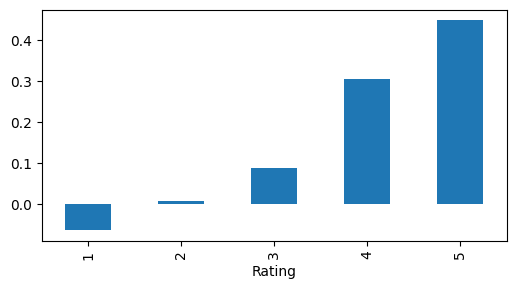

In [39]:
# 4. 1. Polarité
# a. Représentation graphique de la polarité par commentaire par note
import textblob as tb
import spacy
print(spacy.__version__)

df['polarity'] = df['Content'].apply(lambda x: tb.TextBlob(x).sentiment.polarity)
plt.figure(figsize=(6,3))
df.groupby('Rating')['polarity'].mean().plot(kind='bar')

<Axes: xlabel='polarity', ylabel='Count'>

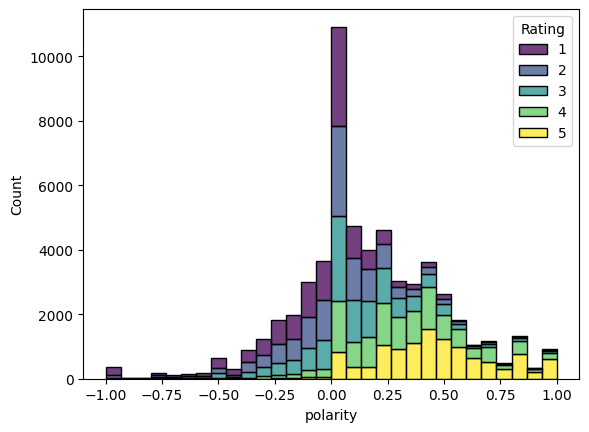

In [40]:
# b. Représentation graphique de la polarité par commentaire par note
sns.histplot(data=df, x='polarity', hue='Rating', bins=30, multiple='stack', palette ="viridis")


In [41]:
# 4. 2. Subjectivité
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

def extract_polarity_words(text):
    blob = tb.TextBlob(text)
    words_with_tags = blob.tags  # Liste de tuples (mot, tag)

    # Extraire les adjectifs (JJ) et les verbes (VB)
    polarity_words = [word for word, tag in words_with_tags if tag.startswith("JJ") or tag.startswith("VB")]

    return polarity_words if polarity_words else None

df['subjectivity'] = df['Content'].apply(lambda x: tb.TextBlob(x).sentiment.subjectivity)
df['polarity_words'] = df['Content'].apply(extract_polarity_words)



<Axes: xlabel='Rating'>

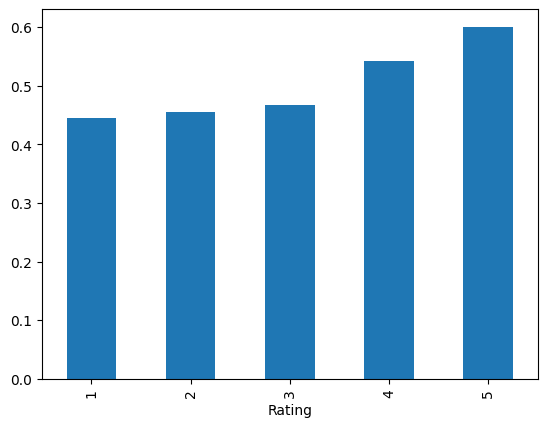

In [45]:
# a. Représentation graphique de la subjectivité par note
df.groupby('Rating')['subjectivity'].mean().plot(kind='bar')



<Axes: xlabel='subjectivity', ylabel='Count'>

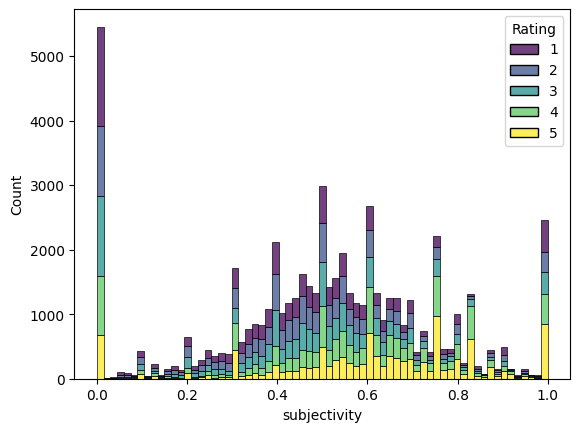

In [42]:
# b. Distribution de la subjectivité par note
sns.histplot(data=df, x='subjectivity', hue='Rating', multiple='stack', palette ="viridis")

 Corrélation entre polarité et subjectivité : 0.293


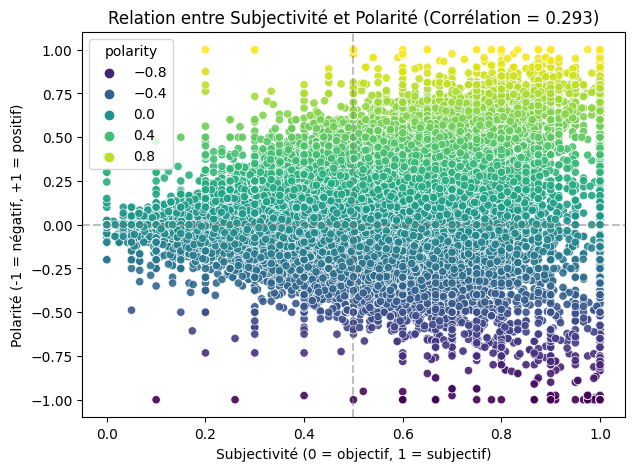

In [43]:
# c. Comparaison entre subjectivité et polarité
correlation = df[['polarity', 'subjectivity']].corr().iloc[0,1]
print(f" Corrélation entre polarité et subjectivité : {correlation:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='subjectivity', y='polarity', alpha=0.9, hue='polarity', palette="viridis")
plt.title(f"Relation entre Subjectivité et Polarité (Corrélation = {correlation:.3f})")
plt.xlabel("Subjectivité (0 = objectif, 1 = subjectif)")
plt.ylabel("Polarité (-1 = négatif, +1 = positif)")
plt.axhline(0, color='gray', linestyle='dashed', alpha=0.5)  # Ligne horizontale à polarité neutre
plt.axvline(0.5, color='gray', linestyle='dashed', alpha=0.5)  # Ligne verticale à subjectivité médiane
plt.show()

🔍 Corrélation pour les avis extrêmes : -0.127


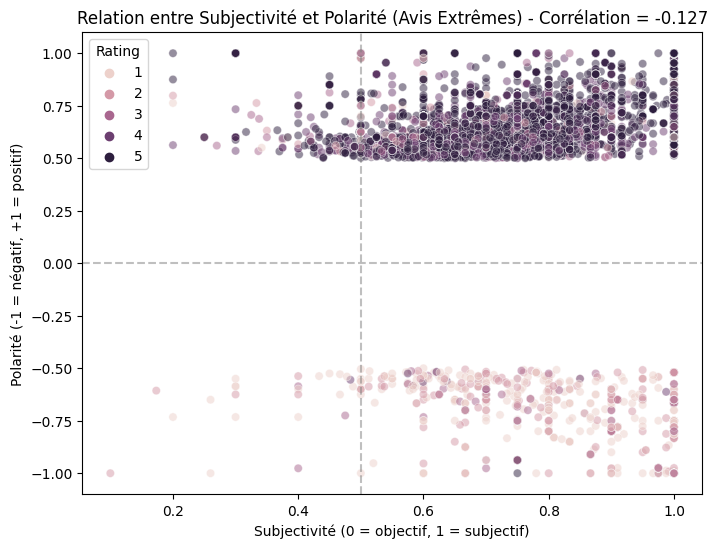

In [44]:
df_extreme = df[(df['polarity'] > 0.5) | (df['polarity'] < -0.5)]
extreme_correlation = df_extreme[['polarity', 'subjectivity']].corr().iloc[0,1]
print(f"🔍 Corrélation pour les avis extrêmes : {extreme_correlation:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_extreme, x='subjectivity', y='polarity', alpha=0.5, color='red', hue="Rating")
plt.title(f"Relation entre Subjectivité et Polarité (Avis Extrêmes) - Corrélation = {extreme_correlation:.3f}")
plt.xlabel("Subjectivité (0 = objectif, 1 = subjectif)")
plt.ylabel("Polarité (-1 = négatif, +1 = positif)")
plt.axhline(0, color='gray', linestyle='dashed', alpha=0.5)  # Ligne neutre
plt.axvline(0.5, color='gray', linestyle='dashed', alpha=0.5)  # Subjectivité médiane
plt.show()